In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linear_model = ctypes.CDLL("modele/linear/target/release/liblinear_classification.so")

linear_model.LM_init.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_double,
    ctypes.c_char
]
linear_model.LM_init.restype = ctypes.POINTER(ctypes.c_void_p)

linear_model.LM_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]

linear_model.LM_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.c_size_t
]

linear_model.LM_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

## Xor test

### Parameters

In [54]:
learning_rate = 0.001
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.1
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

flatten vector [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


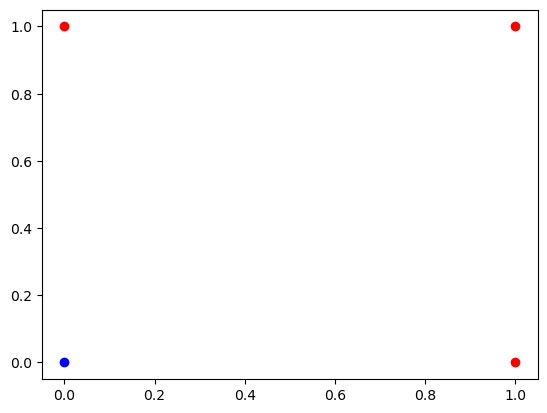

<Figure size 640x480 with 0 Axes>

In [58]:
# XOR test

x_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([-1.0, 1.0, 1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 4, 1
# n_samples, n_features = x_train.shape[0], x_train.shape[1]

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [59]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[0.0], [0.0], [0.0], [1.0]]
vector y : [-1.0, 1.0, 1.0, -1.0]
Training completed


0

In [60]:
predictions = np.zeros(n_samples, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples,
    n_features,
    predictions
)

print("---------------")
print(predictions)
print("---------------")

---------------
[ 0.3337585   0.3337585   0.3337585  -0.99949774]
---------------
vector x : [0.0, 0.0, 0.0, 1.0]
samples : 4
features : 1
vector x converted : [[0.0], [0.0], [0.0], [1.0]]


In [53]:
linear_model.LM_free(model)

0

## simple linear test

In [3]:
learning_rate = 0.01
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.5
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

flatten vector [[1. 1.]
 [2. 3.]
 [3. 3.]]


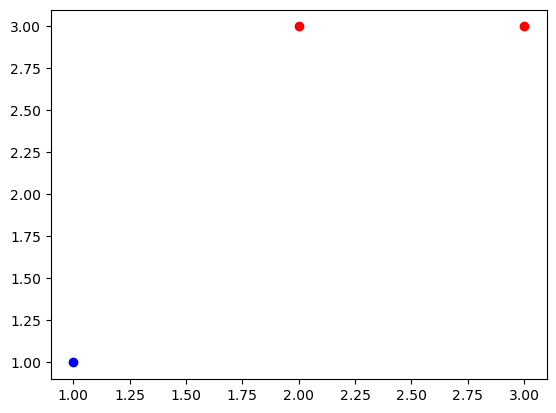

<Figure size 640x480 with 0 Axes>

In [4]:
x_train = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([1.0, -1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 3, 2

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [5]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[1.0, 1.0], [2.0, 3.0], [3.0, 3.0]]
vector y : [1.0, -1.0, -1.0]
Training completed


0

In [6]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)

print(predictions)

[-0.42 -0.42 -0.42]
vector x : [1.0, 1.0, 2.0, 3.0, 3.0, 3.0]
samples : 3
features : 2
vector x converted : [[1.0, 1.0], [2.0, 3.0], [3.0, 3.0]]


In [36]:
linear_model.LM_free(model)

0

# test nuage point 

In [44]:
learning_rate = 0.01
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.2
epochs = 1000000
activation = b't'
n_samples, n_features = 100, 2
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

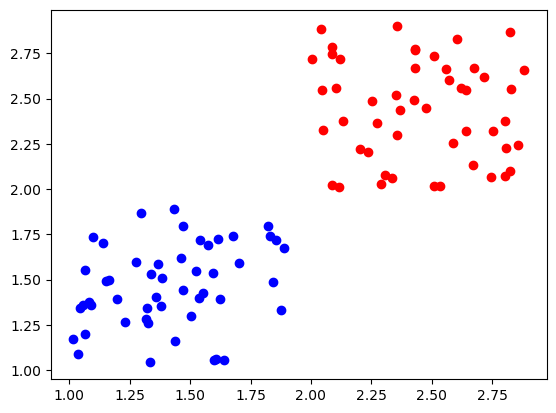

<Figure size 640x480 with 0 Axes>

In [45]:
x_train = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
x_train_flatten = x_train.flatten()
y_train = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()
# print(y_train)
plt.scatter(x_train[0:50, 0], x_train[0:50, 1], color='blue')
plt.scatter(x_train[50:100,0], x_train[50:100,1], color='red')
plt.show()
plt.clf()

In [46]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[1.6751926603123537, 1.7401221981837116], [1.0431635357776905, 1.343357784004101], [1.4386214887859736, 1.1613001188313006], [1.2976190515170452, 1.8663366401352277], [1.5013515351463016, 1.2982270919688563], [1.4335332303231167, 1.8878473454249245], [1.5355675191062472, 1.3959908902045541], [1.2736837803373537, 1.5956606529114201], [1.360288462948994, 1.4041967054897988], [1.6136919096790094, 1.7242293735306449], [1.379550410140089, 1.3559353990593221], [1.2293972937607731, 1.2650685642398982], [1.1509322897946874, 1.489711144726282], [1.5223784609362263, 1.5471813723595431], [1.1409401711223324, 1.7016952588004632], [1.8319158358397905, 1.7400331413441732], [1.0337735476797703, 1.0910305665916193], [1.4606160439684737, 1.6216560173119452], [1.3847075801316886, 1.507815821235932], [1.0159226936101298, 1.168928324826254], [1.5402766785142328, 1.717624306859229], [1.082648172175606, 1.3742547336606106], [1.063095563002346, 1.1980474498453015], [1.8560204067308876, 1.71780961

0

In [50]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)
print("---------------------------------------------------------------")
print(predictions)
print("---------------------------------------------------------------")

---------------------------------------------------------------
[ 0.99998001  1.          1.          0.99999995  1.          0.99999727
  1.          1.          1.          0.99999718  1.          1.
  1.          1.          1.          0.99902381  1.          1.
  1.          1.          0.99999962  1.          1.          0.99902837
  0.99999999  1.          1.          1.          0.99622453  1.
  0.99999942  1.          1.          1.          1.          1.
  0.99999996  1.          1.          0.99999958  1.          1.
  1.          1.          0.99930842  1.          0.99999928  1.
  1.          0.99999875 -1.         -1.         -0.99999994 -1.
 -1.         -0.99999999 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.99999941 -1.         -1.         -1.         -0.99756699 -1.
 -1.         -1.         -0.99999674 -1.         -1.         -0.99999791
 -0.99674389 -1.         -1.         -0.99999993 -1.         -1.
 -

In [ ]:
linear_model.LM_free(model)